In [2]:
%matplotlib inline

In [3]:
import pandas as pd

In [4]:
import seaborn as sns

In [5]:
import numpy as np

In [27]:
import matplotlib.pyplot as plt

In [28]:
plt.rcParams["figure.figsize"] = (20,3)

In [12]:
df = pd.read_excel('DAY_PARTING_BATCH_TABLE.xlsx', sheet_name='Sheet0')

In [13]:
df

,Day of the week,Hour of the day,Campaign,Account,Clicks,Impr.,CTR,Avg. CPC,Cost,Conversions,Cost / conv.,Conv. value,Conv. rate,Conv. value / cost,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,#a.d.sxty old geos,Unnamed: 19
0,Thursday,18,brand.lulu,NaN,1,2,0.5000,0.520000,0.52,0,0.000000,0.00,0.0000,0.00,NaN,NaN,NaN,NaN,#a.d.vibr old geo,NaN
1,Friday,12,brand.lulu,NaN,0,1,0.0000,0.000000,0.00,0,0.000000,0.00,0.0000,0.00,NaN,NaN,NaN,NaN,#a.m. vibr old geos,NaN
2,Friday,18,brand.lulu,NaN,0,3,0.0000,0.000000,0.00,0,0.000000,0.00,0.0000,0.00,NaN,NaN,NaN,NaN,#a.m.sxty old geo,NaN
3,Monday,23,brand.lulu,NaN,0,1,0.0000,0.000000,0.00,0,0.000000,0.00,0.0000,0.00,NaN,NaN,NaN,NaN,brand.adamandeve,NaN
4,Tuesday,7,oct 9 p.m ajay,p.m.,76,1112,0.0683,0.291711,22.17,0,0.000000,0.00,0.0000,0.00,NaN,NaN,NaN,NaN,brand.amazon,NaN
5,Tuesday,8,oct 9 p.m ajay,p.m.,109,1567,0.0696,0.384862,41.95,3,13.983333,139.78,0.0275,3.33,NaN,NaN,NaN,NaN,brand.aneros,NaN
6,Wednesday,12,oct 9 p.m ajay,p.m.,134,2188,0.0612,0.351791,47.14,1,47.140000,77.69,0.0075,1.65,NaN,NaN,NaN,NaN,brand.babeland,NaN
7,Thursday,9,oct 9 p.m ajay,p.m.,122,1743,0.0700,0.371967,45.38,0,0.000000,0.00,0.0000,0.00,NaN,NaN,NaN,NaN,brand.bvibe,NaN
8,Thursday,10,oct 9 p.m ajay,p.m.,124,1801,0.0689,0.378145,46.89,4,11.722500,169.97,0.0323,3.62,NaN,NaN,NaN,NaN,brand.calexoticss,NaN
9,Thursday,14,p.d. old geo,p.d.,67,952,0.0704,0.602836,40.39,2,20.195000,313.86,0.0299,7.77,NaN,NaN,NaN,NaN,brand.docjohnson,NaN


In [110]:
df.dropna(axis=1, how='all', inplace=True) # drops all columns where all values are NaN

In [111]:
df.drop(['Campaign','Account','Unnamed: 19','#a.d.sxty old geos'],axis=1,inplace=True) # drop some needless data

In [16]:
df2 = df[['Day of the week', 'Hour of the day','Conv. value / cost']] # retain only conversions for now

In [17]:
df2

,Day of the week,Hour of the day,Conv. value / cost
0,Thursday,18,0.00
1,Friday,12,0.00
2,Friday,18,0.00
3,Monday,23,0.00
4,Tuesday,7,0.00
5,Tuesday,8,3.33
6,Wednesday,12,1.65
7,Thursday,9,0.00
8,Thursday,10,3.62
9,Thursday,14,7.77


In [18]:
df2.columns = ['day','hour','revenue/$'] # rename to make column names shorter

In [122]:
# days_index_dict = {'Monday':0,'Tuesday':1,"Wednesday":2,"Thursday":3,"Friday":4,"Saturday":5,"Sunday":6}

In [123]:
df2 = df2.replace({'day':days_index_dict}) 

## I am trying to get a heat map for conversions.
 It will indicate what time people are generally buying
Hours are PST, but main cities are on East coast, so we should add a 3 hours as a rough fix right now. We can refine this later.

In [23]:
df3 = df2.pivot_table(index='day', columns='hour',values='revenue/$', aggfunc=np.average)

In [24]:
df3

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
Friday,30.250741,0.838077,11.480727,0.727593,0.953750,15.953750,21.396964,4.332586,3.523333,3.968772,...,5.274576,7.812167,1.492105,22.242632,3.011091,3.893393,11.072321,21.768571,6.296364,2.703889
Monday,5.085455,7.884444,0.684000,7.019057,7.159074,16.835000,3.653214,9.749123,8.868929,5.840000,...,6.190588,1.835686,27.628235,9.493529,6.454706,5.374118,4.250784,4.846939,14.101200,1.564400
Saturday,4.342727,2.190566,1.796346,2.261132,6.077091,1.102857,3.603158,1.646491,15.459649,17.084643,...,7.628909,5.428182,32.530364,2.753636,3.243571,3.371786,9.354643,37.636786,5.792778,0.901607
Sunday,2.084107,1.132500,17.707593,0.482453,6.177857,4.635263,1.651250,5.845088,31.399821,17.115088,...,6.526071,8.603750,3.599821,5.660536,10.543091,4.081607,4.298214,6.553929,4.111636,9.282222
Thursday,3.753860,1.176429,3.738182,3.745357,9.050169,10.768644,3.750172,8.716102,3.656833,3.413667,...,6.942069,3.205893,3.350702,3.939138,12.312069,8.117759,2.176667,6.483158,1.632545,4.272857
Tuesday,20.645962,4.711400,19.306275,12.420192,2.391373,799.445370,5.770000,10.122778,1.379423,10.609074,...,3.615094,0.712542,8.483966,6.103793,10.815263,3.250702,7.428421,6.252500,5.684035,11.126667
Wednesday,28.570545,56.994364,6.688214,1.030357,3.345517,4.307759,25.814211,3.990702,9.402069,6.834737,...,8.330172,38.507241,3.018000,1.324667,3.577500,3.224000,3.292203,3.516667,5.157627,4.895000


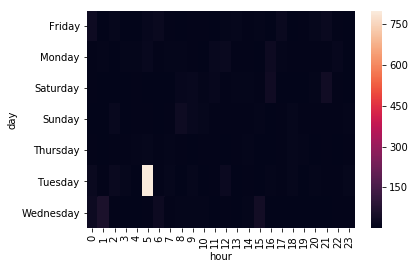

In [26]:
sns.heatmap(df3)

Brighter indicates more conversions. We already knew about Friday evening, but there is a bright spot Tuesday 10 PST as well. Maybe people are trying to get product delivery by the weekend? Worth exploring.